In [1]:
import requests
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor
import multiprocessing
import os
import concurrent.futures
from urllib.parse import urlparse



class NotFoundException(Exception):
    def __init__(self, *args, **kwargs):
        Exception.__init__(self, *args, **kwargs)  


class I_Module:

    def __init__(self,url_list:list):
        self.url_list = url_list  
        self.filenames = []
        self.count = 0 
    
    
    def __iter__(self):
        return self
    
    
    #returns the next filename
    def __next__(self):
        self.count +=1
        if self.count > len(self.filenames):
            raise StopIteration
        return self.filenames[self.count]


    def download(self,url,filename = None):
        if filename == None:
            #extracting filename/last-component
            filename = os.path.basename(urlparse(url).path)
        
        #checking for error
        r = requests.get(url)
        if (r.status_code == 400):
            raise NotFoundException('ERROR - Statuscode: 400')
     
        #checking if actual url_list contains url
        if(not url in self.url_list ):
            self.url_list.append(url)
            self.filenames.append(filename)
            #accessing response body as bytes as we are working with files 
            # saving the book   
            with open(filename,'wb') as fd:
                fd.write(r.content)
        
        return filename

    

    def multi_download(self,url_list:list,workers=5):
        with ThreadPoolExecutor(workers) as ex:
            #concurrent call to the download function with url_list as *iterables
            res = ex.map(self.download,url_list,timeout=None)
        #return value: filenames as it is the return value from download func 
        print(list(res))
        return list(res)
    
    
    def urllist_generator(self):
        for url in self.url_list:
            yield url



    def avg_vowels(self,file):
        num_words = 0
        num_vowels = 0
        vowel = set('aeiouAEIOU') 
        with open(file,encoding="utf8") as f:
            for line in f:
                words = line.split()
                num_words += len(words)
                for str in line:
                    for alpha in str:
                        if alpha in vowel:
                            num_vowels +=1    

        average_num_vowels_per_word = round(num_vowels/num_words,2)
        return average_num_vowels_per_word
    
    
    
    def hardest_read(self,list_of_filenames,work=multiprocessing.cpu_count()): 
        #if __name__ == '__main__':
        res = []
        with ProcessPoolExecutor(work) as ex:
            res = ex.map(self.avg_vowels,list_of_filenames) 
            ex.shutdown()
        print(list(res))
        return list(res)        
        
       




    

In [2]:
#testing the Module
           
urls = [
'https://gutenberg.org/files/1184/1184-0.txt','https://gutenberg.org/files/120/120-0.txt',
'https://gutenberg.org/files/58585/58585-0.txt','https://gutenberg.org/files/2852/2852-0.txt',
'https://gutenberg.org/files/1400/1400-0.txt','https://gutenberg.org/files/2600/2600-0.txt',
'https://gutenberg.org/files/902/902-0.txt','https://gutenberg.org/files/16/16-0.txt',
'http://gutenberg.org/cache/epub/15399/pg15399.txt','http://gutenberg.org/cache/epub/20203/pg20203.txt'
]
        
 
file_names = [
'1184-0.txt', '120-0.txt', '58585-0.txt', '2852-0.txt', '1400-0.txt',
'2600-0.txt', '902-0.txt', '16-0.txt', 'pg15399.txt', 'pg20203.txt'
]
 
    
book_dict = {
'The count of M.C': '1184-0.txt',
'Treasure Island': '120-0.txt',
'Great Expectations:':'1400-0.txt',
'Peter Pan': '16-0.txt',
'War and Peace': '2600-0.txt',
'T.H.O Baske..':'2852-0.txt',
'The Prophet':'58585-0.txt',
'The H. Prince':'902-0.txt',
'Gustavas Vassa':'pg15399.txt',
'Benjamin Franklin':'pg20203.txt'
}
    
       

    
    
    
md = I_Module([])

#testing multidownload_func
md.multi_download(urls)








['1184-0.txt', '120-0.txt', '58585-0.txt', '2852-0.txt', '1400-0.txt', '2600-0.txt', '902-0.txt', '16-0.txt', 'pg15399.txt', 'pg20203.txt']


[]

In [3]:
#testing generator
for url in md.urllist_generator():
    print(url)


https://gutenberg.org/files/58585/58585-0.txt
https://gutenberg.org/files/120/120-0.txt
https://gutenberg.org/files/2852/2852-0.txt
https://gutenberg.org/files/1400/1400-0.txt
https://gutenberg.org/files/902/902-0.txt
https://gutenberg.org/files/16/16-0.txt
http://gutenberg.org/cache/epub/15399/pg15399.txt
http://gutenberg.org/cache/epub/20203/pg20203.txt
https://gutenberg.org/files/1184/1184-0.txt
https://gutenberg.org/files/2600/2600-0.txt


In [4]:
#testing iterator
my_iterator = iter(md)
element1 = next(my_iterator)
element2 = next(my_iterator)
print(element1,element2)

120-0.txt 2852-0.txt


In [5]:
#testing hardest_read func
md.hardest_read(file_names)


[1.69, 1.54, 1.62, 1.6, 1.58, 1.67, 1.58, 1.56, 1.62, 1.68]


[]

In [6]:
#getting key/value for booktitles and average vowels/word:
my_dic = {}
for k in book_dict.keys():
    result = md.avg_vowels(book_dict[k])
    my_dic.update({k:result})

print(my_dic)

{'The count of M.C': 1.69, 'Treasure Island': 1.54, 'Great Expectations:': 1.58, 'Peter Pan': 1.56, 'War and Peace': 1.67, 'T.H.O Baske..': 1.6, 'The Prophet': 1.62, 'The H. Prince': 1.58, 'Gustavas Vassa': 1.62, 'Benjamin Franklin': 1.68}


In [7]:
#sorting books
sort_titles = sorted(my_dic.items(), key=lambda x: x[1], reverse=True)
print(sort_titles)

[('The count of M.C', 1.69), ('Benjamin Franklin', 1.68), ('War and Peace', 1.67), ('The Prophet', 1.62), ('Gustavas Vassa', 1.62), ('T.H.O Baske..', 1.6), ('Great Expectations:', 1.58), ('The H. Prince', 1.58), ('Peter Pan', 1.56), ('Treasure Island', 1.54)]


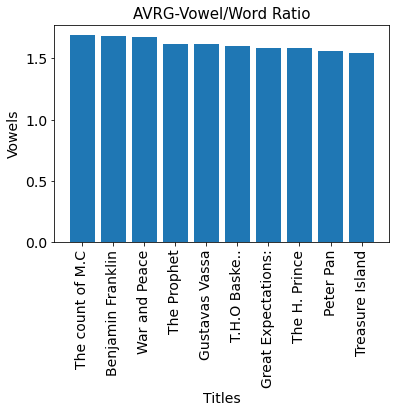

In [8]:
#Plotting
import matplotlib.pyplot as plt

list_bar_x = []
list_bar_y = []
for a in sort_titles:
   list_bar_x.append(str(a[0]))
   list_bar_y.append(a[1])

plt.figure()
plt.bar(list_bar_x, list_bar_y, linewidth=5)

# Set chart title and label axes. 
plt.title("AVRG-Vowel/Word Ratio", fontsize=15)
plt.xlabel("Titles", fontsize=14)
plt.ylabel("Vowels", fontsize=14)
plt.xticks(rotation=90)
 # Set size of tick labels.
plt.tick_params(axis='both', labelsize=14)
plt.show()